<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/Logistic_Regression_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Analyze dataset**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


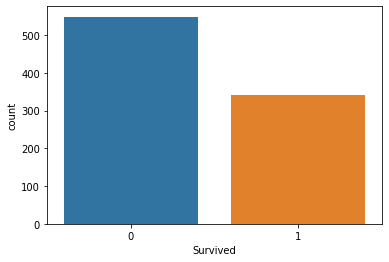

In [12]:
sns.countplot("Survived",data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


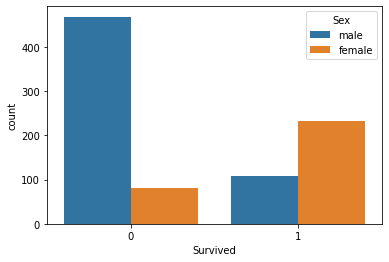

In [13]:
sns.countplot("Survived", hue="Sex", data=titanic_data)

#Female survived more

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


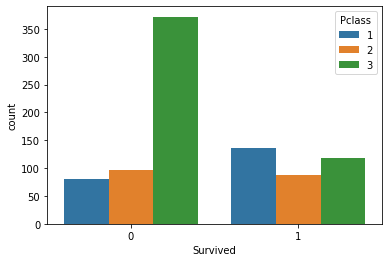

In [15]:
sns.countplot("Survived", hue="Pclass", data=titanic_data)

#People of class 3 surviced less

<Figure size 1080x432 with 0 Axes>

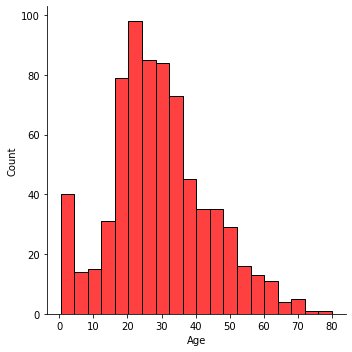

In [24]:
plt.figure(figsize=(15,6))
sns.displot(titanic_data, x="Age", color='red')

#More people are in the age of 15-30

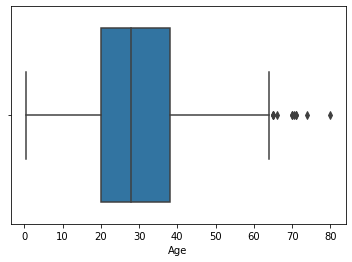

In [26]:
sns.boxplot(x="Age", data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


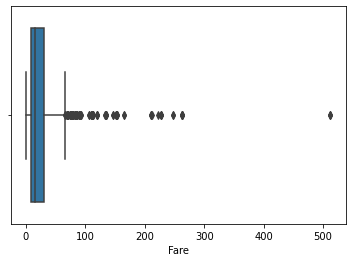

In [57]:
sns.boxplot(titanic_data['Fare'], data=titanic_data)

People over 60 years, and less than 5 years:


In [35]:
print(len(titanic_data[(titanic_data['Age']>=60)]))
print("")
print(len([x for x in titanic_data['Age'] if x<=5 and x>0]))

26

44


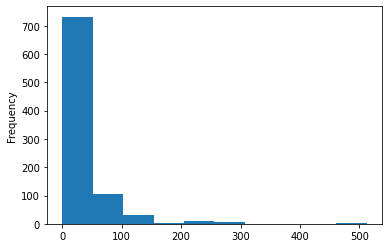

In [36]:
titanic_data['Fare'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


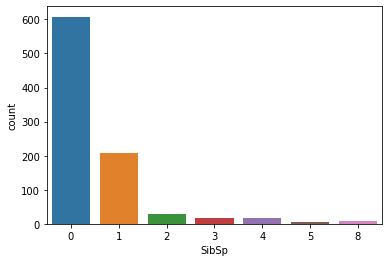

In [38]:
sns.countplot("SibSp", data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


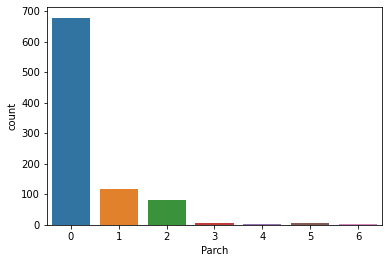

In [39]:
sns.countplot("Parch", data=titanic_data)

**Data wrangling**

Percentage of null values in dataset:

In [40]:
titanic_data.isna().sum()/len(titanic_data)

#Cabin has 77% null values, thus can be dropped

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [42]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [44]:
#since mean~median
titanic_data['Age']=titanic_data.Age.fillna(titanic_data['Age'].mean()) 

In [45]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
titanic_data['Embarked'].mode()

0    S
dtype: object

In [53]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode().values[0])

In [55]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
sex = pd.get_dummies(titanic_data["Sex"])
sex.head(4)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0


In [60]:
embark = pd.get_dummies(titanic_data["Embarked"])
embark.head(4)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1


In [61]:
titanic_data=pd.concat([titanic_data,sex,embark], axis=1 )

In [62]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [67]:
titanic_data.drop(["PassengerId", "Name", "Sex", "Ticket", "Embarked"], axis=1, inplace=True)

In [68]:
# plt.figure(figsize=(15,6))
# sns.heatmap(titanic_data.corr(), annot=True)

titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Modelling**

Train Test split

In [69]:
X=titanic_data.iloc[:,1:]
y=titanic_data['Survived']

In [71]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

lr=LogisticRegression()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

Logistic Regression

In [76]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred=lr.predict(X_test)

In [84]:
print(metrics.accuracy_score(y_test, y_pred),'\n')

print(classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

0.8171641791044776 

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.76      0.75      0.76       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

[[143  24]
 [ 25  76]]


In [85]:
from collections import Counter
Counter(y_pred)

Counter({0: 168, 1: 100})

In [87]:
print(y_test.value_counts())

0    167
1    101
Name: Survived, dtype: int64


Preprocessing: Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=444)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))


#similar accuracy after scaling too.

0.8171641791044776
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.76      0.75      0.76       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

[[143  24]
 [ 25  76]]
